In [ ]:
## Dimension reduction methods (PCA,TSNE,ICA) for RNAseq data


In [4]:
library(plotly)
library(DESeq2)

Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mappl

In [5]:
countdata <- read.csv('/home/rstudio/SingleCellProject/R_wdir/Final_data/counts_filtered_final_441.csv',row.names=1)
met <- read.csv('/home/rstudio/SingleCellProject/R_wdir/Final_data/metadata_all_filtered_final_417.csv',row.names=1)
cols <- met[,'cell']
cols <- as.character(cols)
countdata <- countdata[,cols]

countdata <- countdata[rowSums(countdata>0)>10, ]
countdata <- countdata[rowSums(countdata)>1, ]

geneTypes <- factor( c( ENSM="ENSM", ERCC="ERCC" )[
  substr( rownames(countdata), 1, 4 ) ] )


counts.Mmus <- countdata[ which( geneTypes=="ENSM" ), ]

sizeF.Mmus <- estimateSizeFactorsForMatrix( counts.Mmus )

nCountsMmus <- t( t(counts.Mmus) / sizeF.Mmus )

LogNcountsMmus=log2(nCountsMmus+1)

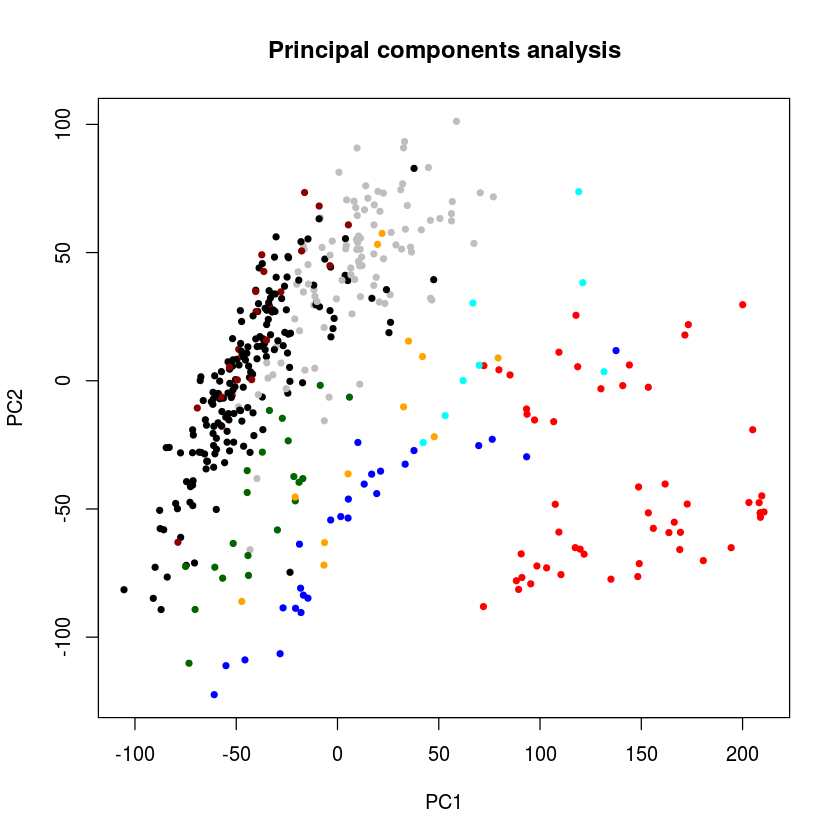

In [6]:
base.pca <- prcomp(t(LogNcountsMmus)) ## Create a prcomp object

plot(base.pca$x[,1],base.pca$x[,2],pch=20,
     col=c("orange","black","darkgreen","cyan","darkred","grey","blue","red")[as.numeric(met$clusterboot)],
     xlab='PC1',ylab='PC2',main='Principal components analysis')

In [7]:
library(Rtsne)

d <- stats::dist(t(LogNcountsMmus))
set.seed(123) 
tsne_out <- Rtsne(d,
                  dims=2,
                  initial_dims=5,
                  is_distance=TRUE, 
                  perplexity=40, 
                  verbose = 2,
                  theta=0.1,pca=T) 

Read the 417 x 417 data matrix successfully!
Using no_dims = 2, perplexity = 40.000000, and theta = 0.100000
Computing input similarities...
Building tree...
 - point 0 of 417
Done in 0.25 seconds (sparsity = 0.452116)!
Learning embedding...
Iteration 50: error is 75.826519 (50 iterations in 0.67 seconds)
Iteration 100: error is 86.356831 (50 iterations in 0.67 seconds)
Iteration 150: error is 88.671567 (50 iterations in 0.60 seconds)
Iteration 200: error is 92.530769 (50 iterations in 0.62 seconds)
Iteration 250: error is 91.858136 (50 iterations in 0.64 seconds)
Iteration 300: error is 2.287339 (50 iterations in 0.78 seconds)
Iteration 350: error is 1.664844 (50 iterations in 0.84 seconds)
Iteration 400: error is 1.379702 (50 iterations in 0.61 seconds)
Iteration 450: error is 1.309850 (50 iterations in 0.46 seconds)
Iteration 500: error is 1.198902 (50 iterations in 0.44 seconds)
Iteration 550: error is 1.157548 (50 iterations in 0.43 seconds)
Iteration 600: error is 1.153555 (50 it

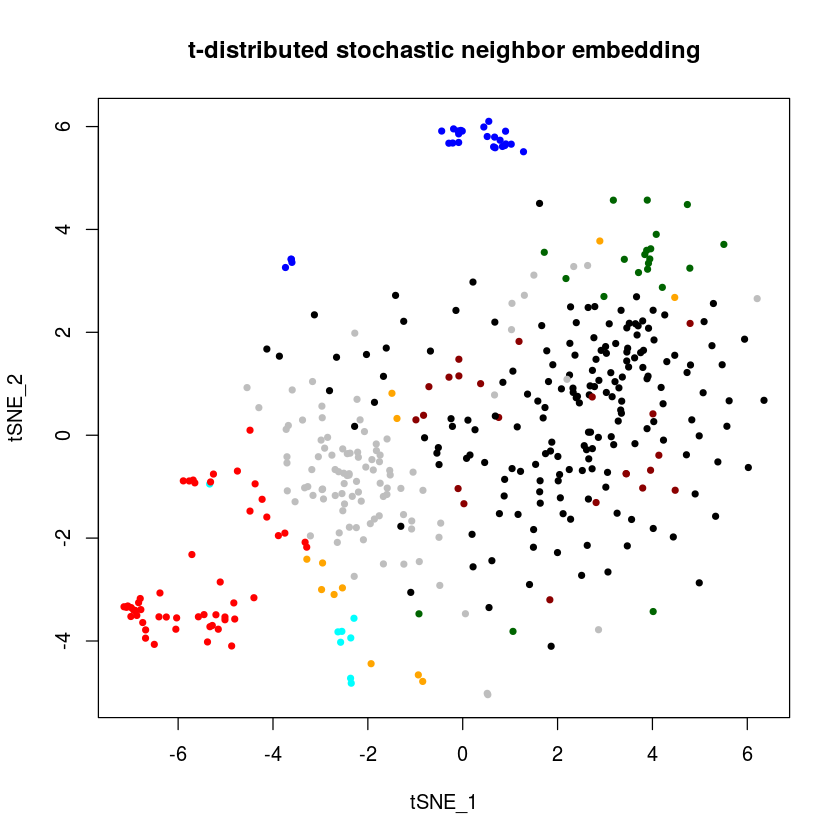

In [8]:
plot(tsne_out$Y[,1],tsne_out$Y[,2],pch=20,
     col=c("orange","black","darkgreen","cyan","darkred","grey","blue","red")[as.numeric(met$clusterboot)],
     xlab='tSNE_1',ylab='tSNE_2',main='t-distributed stochastic neighbor embedding')

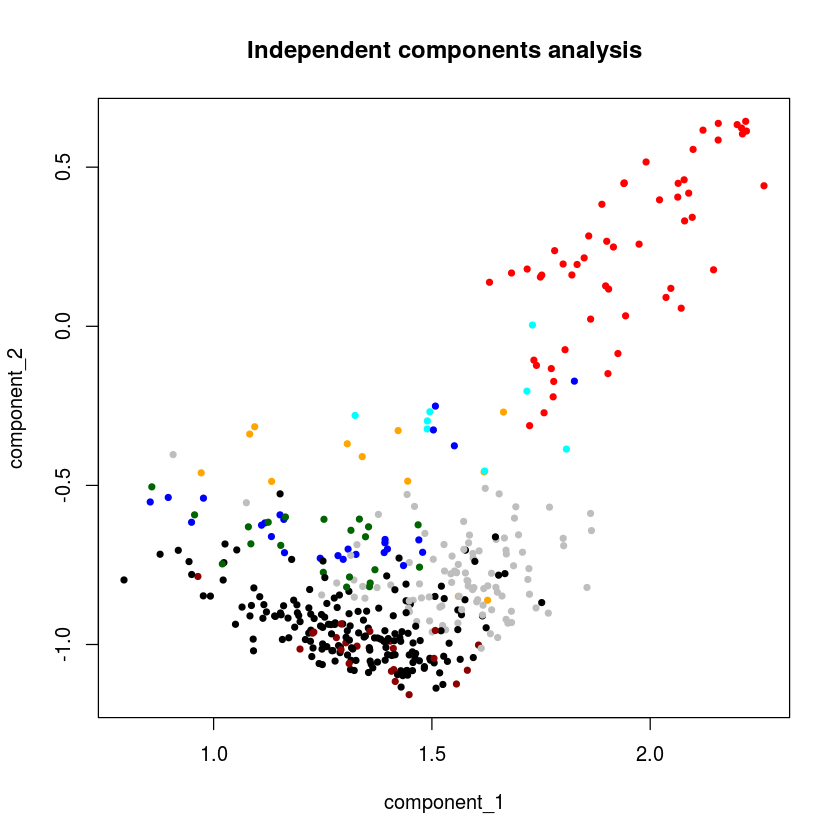

In [9]:
library(fastICA) 

# The data matrix X is considered to be a linear combination of non-Gaussian (independent) components
# i.e. X = SA where columns of S contain the independent components and A is a linear mixing
# matrix. In short ICA attempts to ‘un-mix’ the data by estimating an un-mixing matrix W where XW = S


ics <- fastICA(LogNcountsMmus,2)

plot(ics$A[1,],ics$A[2,],pch=20,
     col=c("orange","black","darkgreen","cyan","darkred","grey","blue","red")[as.numeric(met$clusterboot)],
     xlab='component_1',ylab='component_2',main='Independent components analysis')

In [10]:
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.1 LTS

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] fastICA_1.2-0              Rtsne_0.11                
 [3] DESeq2_1.14.1              SummarizedExperiment_1.4.0
 [5] Biobase_2.34.0             GenomicRanges_1.26.4      
 [7] GenomeInfoDb_1.10.3        IRanges_2.8.2             
 [9] S4Vectors_0.12.2           BiocGenerics_0.20.0       
[11] plotly_4.5.6               ggplot2_2.2.1.9000        

loaded via a namespace (and not